In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [13]:
from scipy.io import loadmat
import pandas as pd

# Carga el archivo .mat
data = loadmat('hsefeatures.mat')

# Muestra las claves (variables) almacenadas en el archivo
print("Variables en el archivo:", data.keys())

# Explora todas las variables y sus shapes
for key in data:
    if not key.startswith('__'):
        print(f"{key}: {type(data[key])}, shape: {getattr(data[key], 'shape', 'N/A')}")

# Accede a la variable 'features' (ajusta el nombre si es diferente)
heart = data['heart']
print("Shape de heart:", heart.shape)



# Si quieres convertirlo a DataFrame (si es 2D)
df = pd.DataFrame(heart)
print(df.head())

Variables en el archivo: dict_keys(['__header__', '__version__', '__globals__', 'heart'])
heart: <class 'numpy.ndarray'>, shape: (13015, 28)
Shape de heart: (13015, 28)
         0         1         2         3         4         5         6   \
0  0.330670  0.339032 -0.942820 -0.707676  0.501767 -0.119639 -0.447719   
1  0.331246  0.336737 -0.927206 -0.694687  0.508971 -0.120814 -0.453824   
2  0.331770  0.344386 -0.923716 -0.682372  0.488986 -0.113470 -0.434460   
3  0.329360  0.331383 -0.953241 -0.699698  0.492007 -0.112001 -0.435856   
4  0.331467  0.347445 -0.898084 -0.699024  0.519661 -0.135503 -0.470572   

         7         8         9   ...        18        19        20        21  \
0  1.783492  0.238308 -1.157191  ... -0.144814 -0.308339 -0.020249  0.654093   
1  0.807546 -0.053670 -1.076089  ...  0.080666 -0.798582 -0.299248  1.655671   
2  1.313518 -0.162544 -1.002464  ...  0.427350  0.263785 -0.124278  1.151582   
3  1.026310 -0.231880 -1.094214  ...  0.372958 -0.640030 -0.

In [14]:
print(df[27].unique())

[0. 1.]


In [15]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]  # Todas las columnas menos la última
y = df.iloc[:, -1]   # Última columna (target)

print("Media de cada columna:")
print(X.mean())

print("\nDesviación estándar de cada columna:")
print(X.std())

print("\nMínimo y máximo de cada columna:")
print(X.min())
print(X.max())

Xtrain_flat, Xtest_flat, Ytrain, Ytest = train_test_split(X, y, test_size=1/3)

Media de cada columna:
0    -1.747012e-17
1    -1.310259e-17
2    -1.921714e-16
3    -2.183766e-16
4     3.057272e-17
5     6.551297e-18
6     1.091883e-17
7    -5.241037e-17
8     5.197362e-16
9    -6.332920e-16
10    1.747012e-17
11    2.271116e-16
12   -5.241037e-17
13   -7.424803e-17
14   -2.375937e-15
15   -6.988050e-17
16    6.988050e-17
17    1.747012e-17
18    9.608569e-17
19    7.861556e-17
20    1.834363e-16
21    5.241037e-17
22    2.096415e-16
23    2.140090e-16
24    1.747012e-16
25    1.747012e-17
26   -1.615987e-16
dtype: float64

Desviación estándar de cada columna:
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
dtype: float64

Mínimo y máximo de cada columna:
0    -11.604172
1    -11.555400
2     -1.219734
3     -0.931188
4     -8.099012
5     -7.726

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
print("Mínimo:", X_normalized.min(axis=0))
print("Máximo:", X_normalized.max(axis=0))


Mínimo: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
Máximo: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1.]


In [9]:
# ...existing code...

def LogisticRegressionTraining(Xtrain, Ytrain, Xtest, Ytest, max_iter=500):
    mdl = LogisticRegression(max_iter=max_iter, solver='lbfgs')
    mdl.fit(Xtrain, Ytrain)
    Ypred = mdl.predict(Xtest)
    return accuracy_score(Ytest, Ypred)

def QDATraining(Xtrain, Ytrain, Xtest, Ytest):
    mdl = QuadraticDiscriminantAnalysis()
    mdl.fit(Xtrain, Ytrain)
    Ypred = mdl.predict(Xtest)
    return accuracy_score(Ytest, Ypred)

def KNNTraining(Xtrain, Ytrain, Xtest, Ytest, n_neighbors=5):
    mdl = KNeighborsClassifier(n_neighbors=n_neighbors)
    mdl.fit(Xtrain, Ytrain)
    Ypred = mdl.predict(Xtest)
    return accuracy_score(Ytest, Ypred)

def DecisionTreeTraining(Xtrain, Ytrain, Xtest, Ytest, max_depth=5):
    mdl = tree.DecisionTreeClassifier(max_depth=max_depth)
    mdl.fit(Xtrain, Ytrain)
    Ypred = mdl.predict(Xtest)
    return accuracy_score(Ytest, Ypred)

def GaussianNBTraining(Xtrain, Ytrain, Xtest, Ytest):
    mdl = GaussianNB()
    mdl.fit(Xtrain, Ytrain)
    Ypred = mdl.predict(Xtest)
    return accuracy_score(Ytest, Ypred)

def MLPTraining(Xtrain, Ytrain, Xtest, Ytest, hidden_layer_sizes=(50,), max_iter=300):
    mdl = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter)
    mdl.fit(Xtrain, Ytrain)
    Ypred = mdl.predict(Xtest)
    return accuracy_score(Ytest, Ypred)

def BaggingKNNTraining(Xtrain, Ytrain, Xtest, Ytest, n_neighbors=5, n_estimators=10):
    mdl = BaggingClassifier(
        estimator=KNeighborsClassifier(n_neighbors=n_neighbors),
        n_estimators=n_estimators,
        random_state=42
    )
    mdl.fit(Xtrain, Ytrain)
    Ypred = mdl.predict(Xtest)
    return accuracy_score(Ytest, Ypred)
# ...existing code...

c:\Users\G_Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (978) reached and the optimization hasn't converged yet.
  warnings.warn(


=== Resultados por modelo ===

Modelo: LogisticRegression
  Accuracy promedio: 0.8615
  Mejor accuracy: 0.8615 con params {'max_iter': 582}
  Especificidad promedio (TNR): 0.6723
  Mejor especificidad: 0.6723 con params {'max_iter': 582}

Modelo: QDA
  Accuracy promedio: 0.8400
  Mejor accuracy: 0.8472 con params {'reg_param': 0.18901617968047776}
  Especificidad promedio (TNR): 0.9120
  Mejor especificidad: 0.9356 con params {'reg_param': 0.015942282030095112}

Modelo: KNN
  Accuracy promedio: 0.9122
  Mejor accuracy: 0.9265 con params {'n_neighbors': 4}
  Especificidad promedio (TNR): 0.8026
  Mejor especificidad: 0.8902 con params {'n_neighbors': 4}

Modelo: MLP
  Accuracy promedio: 0.9186
  Mejor accuracy: 0.9286 con params {'hidden_layer_sizes': (130, 173), 'max_iter': 486, 'learning_rate_init': 0.0018516696315852466}
  Especificidad promedio (TNR): 0.8244
  Mejor especificidad: 0.8712 con params {'hidden_layer_sizes': (166, 100), 'max_iter': 850, 'learning_rate_init': 0.008260687

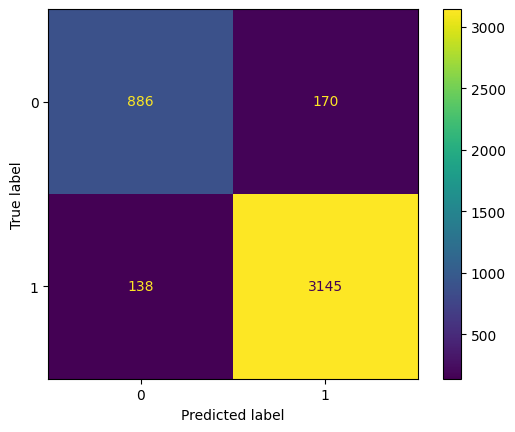

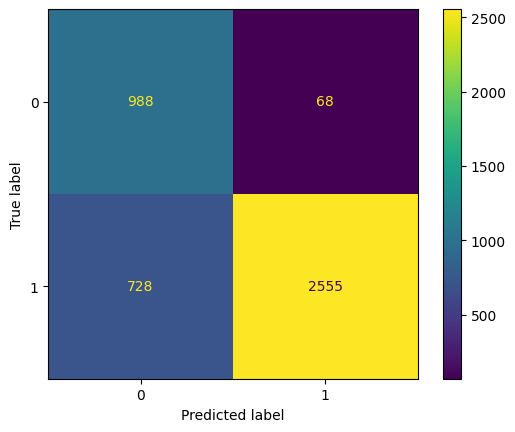

In [ ]:
# ...existing code...
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

def get_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    tn, fp, fn, tp = cm.ravel()
    acc = (tp + tn) / (tp + tn + fp + fn)
    tnr = tn / (tn + fp) if (tn + fp) > 0 else 0  # Specificidad
    return acc, tnr, cm

n_iter = 10  # Puedes aumentar para mayor robustez

model_results = {
    "LogisticRegression": [],
    "QDA": [],
    "KNN": [],
    "MLP": [],
    "Bagging": [],
    "SVM": []
}
model_params = {
    "LogisticRegression": [],
    "QDA": [],
    "KNN": [],
    "MLP": [],
    "Bagging": [],
    "SVM": []
}
model_cms = {
    "LogisticRegression": [],
    "QDA": [],
    "KNN": [],
    "MLP": [],
    "Bagging": [],
    "SVM": []
}

# Entrenamiento
for i in range(n_iter):
    # Logistic Regression
    max_iter = np.random.randint(100, 2001)
    mdl = LogisticRegression(max_iter=max_iter, solver='lbfgs')
    mdl.fit(Xtrain_flat, Ytrain)
    Ypred = mdl.predict(Xtest_flat)
    acc, tnr, cm = get_metrics(Ytest, Ypred)
    model_results["LogisticRegression"].append((acc, tnr))
    model_params["LogisticRegression"].append({"max_iter": max_iter})
    model_cms["LogisticRegression"].append(cm)

    # QDA
    reg_param = np.random.uniform(0, 0.2)
    mdl = QuadraticDiscriminantAnalysis(reg_param=reg_param)
    mdl.fit(Xtrain_flat, Ytrain)
    Ypred = mdl.predict(Xtest_flat)
    acc, tnr, cm = get_metrics(Ytest, Ypred)
    model_results["QDA"].append((acc, tnr))
    model_params["QDA"].append({"reg_param": reg_param})
    model_cms["QDA"].append(cm)

    # KNN
    n_neighbors = np.random.randint(1, 21)
    mdl = KNeighborsClassifier(n_neighbors=n_neighbors)
    mdl.fit(Xtrain_flat, Ytrain)
    Ypred = mdl.predict(Xtest_flat)
    acc, tnr, cm = get_metrics(Ytest, Ypred)
    model_results["KNN"].append((acc, tnr))
    model_params["KNN"].append({"n_neighbors": n_neighbors})
    model_cms["KNN"].append(cm)

    # MLP
    hidden_layer_sizes = tuple(np.random.randint(50, 200, size=np.random.randint(1, 3)))
    max_iter = np.random.randint(200, 1001)
    learning_rate_init = 10**np.random.uniform(-4, -1)
    mdl = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, learning_rate_init=learning_rate_init)
    mdl.fit(Xtrain_flat, Ytrain)
    Ypred = mdl.predict(Xtest_flat)
    acc, tnr, cm = get_metrics(Ytest, Ypred)
    model_results["MLP"].append((acc, tnr))
    model_params["MLP"].append({"hidden_layer_sizes": hidden_layer_sizes, "max_iter": max_iter, "learning_rate_init": learning_rate_init})
    model_cms["MLP"].append(cm)

    # Bagging
    n_neighbors = np.random.randint(1, 11)
    n_estimators = np.random.randint(5, 21)
    mdl = BaggingClassifier(
        estimator=KNeighborsClassifier(n_neighbors=n_neighbors),
        n_estimators=n_estimators,
        max_samples=0.5,
        max_features=0.5,
        random_state=42
    )
    mdl.fit(Xtrain_flat, Ytrain)
    Ypred = mdl.predict(Xtest_flat)
    acc, tnr, cm = get_metrics(Ytest, Ypred)
    model_results["Bagging"].append((acc, tnr))
    model_params["Bagging"].append({"n_neighbors": n_neighbors, "n_estimators": n_estimators})
    model_cms["Bagging"].append(cm)

    # SVM
    C = 10**np.random.uniform(-2, 2)
    gamma = 10**np.random.uniform(-3, 1)
    mdl = SVC(C=C, gamma=gamma, kernel='rbf')
    mdl.fit(Xtrain_flat, Ytrain)
    Ypred = mdl.predict(Xtest_flat)
    acc, tnr, cm = get_metrics(Ytest, Ypred)
    model_results["SVM"].append((acc, tnr))
    model_params["SVM"].append({"C": C, "gamma": gamma, "kernel": "rbf"})
    model_cms["SVM"].append(cm)

# Mostrar resultados por modelo
print("=== Resultados por modelo ===")
best_acc_global = -1
best_tnr_global = -1
best_acc_model = None
best_tnr_model = None
best_acc_params = None
best_tnr_params = None
best_acc_cm = None
best_tnr_cm = None

for model in model_results:
    arr = np.array(model_results[model])
    accs = arr[:,0]
    tnrs = arr[:,1]
    best_acc_idx = np.argmax(accs)
    best_tnr_idx = np.argmax(tnrs)
    print(f"\nModelo: {model}")
    print(f"  Accuracy promedio: {accs.mean():.4f}")
    print(f"  Mejor accuracy: {accs[best_acc_idx]:.4f} con params {model_params[model][best_acc_idx]}")
    print(f"  Especificidad promedio (TNR): {tnrs.mean():.4f}")
    print(f"  Mejor especificidad: {tnrs[best_tnr_idx]:.4f} con params {model_params[model][best_tnr_idx]}")

    # Guardar mejor global
    if accs[best_acc_idx] > best_acc_global:
        best_acc_global = accs[best_acc_idx]
        best_acc_model = model
        best_acc_params = model_params[model][best_acc_idx]
        best_acc_cm = model_cms[model][best_acc_idx]
    if tnrs[best_tnr_idx] > best_tnr_global:
        best_tnr_global = tnrs[best_tnr_idx]
        best_tnr_model = model
        best_tnr_params = model_params[model][best_tnr_idx]
        best_tnr_cm = model_cms[model][best_tnr_idx]

# Mostrar matriz de confusión del mejor modelo en accuracy
print(f"\n=== Mejor modelo en accuracy general ===")
print(f"Modelo: {best_acc_model}")
print(f"Hiperparámetros: {best_acc_params}")
print(f"Accuracy: {best_acc_global:.4f}")
disp = ConfusionMatrixDisplay(confusion_matrix=best_acc_cm, display_labels=[0, 1])
disp.plot()

# Mostrar matriz de confusión del mejor modelo en especificidad
print(f"\n=== Mejor modelo en especificidad general ===")
print(f"Modelo: {best_tnr_model}")
print(f"Hiperparámetros: {best_tnr_params}")
print(f"Especificidad: {best_tnr_global:.4f}")
disp = ConfusionMatrixDisplay(confusion_matrix=best_tnr_cm, display_labels=[0, 1])
disp.plot()

La menor cantidad son enfermos

maximizar la especifidad

Cross validation
----

c:\Users\G_Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\G_Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\G_Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From 


Modelo: LogisticRegression
  Accuracy promedio: 0.8610
  Especificidad promedio (TNR): 0.6447

Modelo: QDA
  Accuracy promedio: 0.8389
  Especificidad promedio (TNR): 0.8930

Modelo: KNN
  Accuracy promedio: 0.9259
  Especificidad promedio (TNR): 0.8225

Modelo: MLP
  Accuracy promedio: 0.9242
  Especificidad promedio (TNR): 0.8339

Modelo: Bagging
  Accuracy promedio: 0.9145
  Especificidad promedio (TNR): 0.7635

Mejor modelo en especificidad: QDA
Hiperparámetros: {'reg_param': 0.028878711370122146}
Especificidad: 0.9091


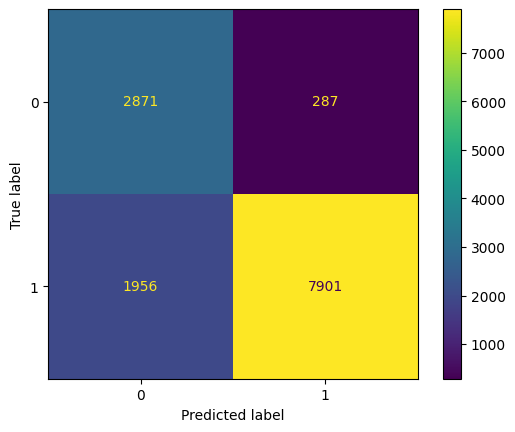

In [11]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict

cv = StratifiedKFold(n_splits=5, shuffle=True)
model_funcs = {
    "LogisticRegression": lambda hp: LogisticRegression(max_iter=hp["max_iter"], solver='lbfgs'),
    "QDA": lambda hp: QuadraticDiscriminantAnalysis(reg_param=hp["reg_param"]),
    "KNN": lambda hp: KNeighborsClassifier(n_neighbors=hp["n_neighbors"]),
    "MLP": lambda hp: MLPClassifier(hidden_layer_sizes=hp["hidden_layer_sizes"], max_iter=hp["max_iter"], learning_rate_init=hp["learning_rate_init"]),
    "Bagging": lambda hp: BaggingClassifier(
        estimator=KNeighborsClassifier(n_neighbors=hp["n_neighbors"]),
        n_estimators=hp["n_estimators"],
        max_samples=0.5,
        max_features=0.5,
        random_state=42
    )
}

n_iter = 10
metrics_results = {k: [] for k in model_funcs}
params_results = {k: [] for k in model_funcs}
best_tnr = -1
best_model = None
best_hp = None
best_cm = None

for model_name, build_model in model_funcs.items():
    for i in range(n_iter):
        # Hiperparámetros aleatorios
        if model_name == "LogisticRegression":
            hp = {"max_iter": np.random.randint(100, 2001)}
        elif model_name == "QDA":
            hp = {"reg_param": np.random.uniform(0, 0.2)}
        elif model_name == "KNN":
            hp = {"n_neighbors": np.random.randint(1, 21)}
        elif model_name == "MLP":
            hp = {
                "hidden_layer_sizes": tuple(np.random.randint(50, 200, size=np.random.randint(1, 3))),
                "max_iter": np.random.randint(200, 1001),
                "learning_rate_init": 10**np.random.uniform(-4, -1)
            }
        elif model_name == "Bagging":
            hp = {
                "n_neighbors": np.random.randint(1, 11),
                "n_estimators": np.random.randint(5, 21)
            }
        else:
            continue

        model = build_model(hp)
        # cross_val_predict para obtener predicciones de CV
        y_pred = cross_val_predict(model, X, y, cv=cv)
        acc, tnr, cm = get_metrics(y, y_pred)
        metrics_results[model_name].append((acc, tnr))
        params_results[model_name].append(hp)
        if tnr > best_tnr:
            best_tnr = tnr
            best_model = model_name
            best_hp = hp
            best_cm = cm

# Mostrar promedios
for model in metrics_results:
    arr = np.array(metrics_results[model])
    print(f"\nModelo: {model}")
    print(f"  Accuracy promedio: {arr[:,0].mean():.4f}")
    print(f"  Especificidad promedio (TNR): {arr[:,1].mean():.4f}")

# Mostrar el mejor modelo en especificidad y su matriz de confusión
print(f"\nMejor modelo en especificidad: {best_model}")
print(f"Hiperparámetros: {best_hp}")
print(f"Especificidad: {best_tnr:.4f}")
disp = ConfusionMatrixDisplay(confusion_matrix=best_cm, display_labels=[0, 1])
disp.plot()

c:\Users\G_Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (413) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\G_Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (672) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\G_Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (473) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\G_Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (206) reached 

=== Resultados por modelo ===

Modelo: LogisticRegression
  Accuracy promedio: 0.8594
  Mejor accuracy: 0.8594 con params {'max_iter': 1268}
  Especificidad promedio (TNR): 0.6285
  Mejor especificidad: 0.6285 con params {'max_iter': 1268}

Modelo: QDA
  Accuracy promedio: 0.8290
  Mejor accuracy: 0.8366 con params {'reg_param': 0.14807051562378964}
  Especificidad promedio (TNR): 0.8928
  Mejor especificidad: 0.9207 con params {'reg_param': 0.003945502721216321}

Modelo: KNN
  Accuracy promedio: 0.9124
  Mejor accuracy: 0.9447 con params {'n_neighbors': 1}
  Especificidad promedio (TNR): 0.7895
  Mejor especificidad: 0.9331 con params {'n_neighbors': 2}

Modelo: MLP
  Accuracy promedio: 0.9129
  Mejor accuracy: 0.9299 con params {'hidden_layer_sizes': (180, 120), 'max_iter': 318, 'learning_rate_init': 0.0017768300862646847}
  Especificidad promedio (TNR): 0.7946
  Mejor especificidad: 0.8663 con params {'hidden_layer_sizes': (193, 64), 'max_iter': 782, 'learning_rate_init': 0.00202434

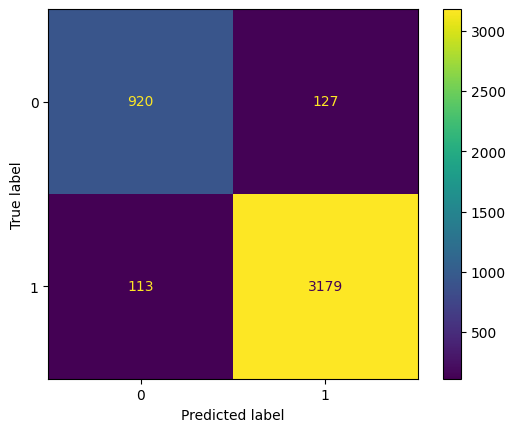

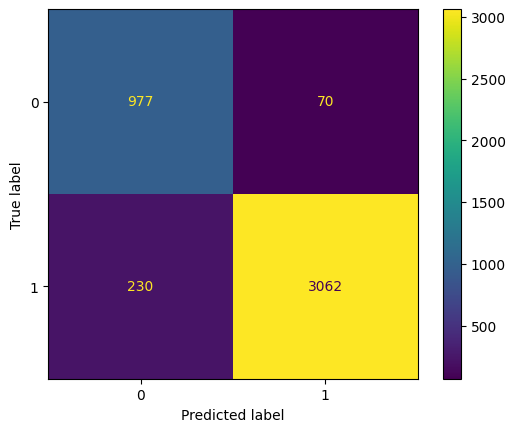

In [17]:
# ...existing code...
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

def get_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    tn, fp, fn, tp = cm.ravel()
    acc = (tp + tn) / (tp + tn + fp + fn)
    tnr = tn / (tn + fp) if (tn + fp) > 0 else 0  # Specificidad
    return acc, tnr, cm

n_iter = 100  # Puedes aumentar para mayor robustez

model_results = {
    "LogisticRegression": [],
    "QDA": [],
    "KNN": [],
    "MLP": [],
    "Bagging": [],
    "SVM": []
}
model_params = {
    "LogisticRegression": [],
    "QDA": [],
    "KNN": [],
    "MLP": [],
    "Bagging": [],
    "SVM": []
}
model_cms = {
    "LogisticRegression": [],
    "QDA": [],
    "KNN": [],
    "MLP": [],
    "Bagging": [],
    "SVM": []
}

# Entrenamiento
for i in range(n_iter):
    # Logistic Regression
    max_iter = np.random.randint(100, 2001)
    mdl = LogisticRegression(max_iter=max_iter, solver='lbfgs')
    mdl.fit(Xtrain_flat, Ytrain)
    Ypred = mdl.predict(Xtest_flat)
    acc, tnr, cm = get_metrics(Ytest, Ypred)
    model_results["LogisticRegression"].append((acc, tnr))
    model_params["LogisticRegression"].append({"max_iter": max_iter})
    model_cms["LogisticRegression"].append(cm)

    # QDA
    reg_param = np.random.uniform(0, 0.2)
    mdl = QuadraticDiscriminantAnalysis(reg_param=reg_param)
    mdl.fit(Xtrain_flat, Ytrain)
    Ypred = mdl.predict(Xtest_flat)
    acc, tnr, cm = get_metrics(Ytest, Ypred)
    model_results["QDA"].append((acc, tnr))
    model_params["QDA"].append({"reg_param": reg_param})
    model_cms["QDA"].append(cm)

    # KNN
    n_neighbors = np.random.randint(1, 21)
    mdl = KNeighborsClassifier(n_neighbors=n_neighbors)
    mdl.fit(Xtrain_flat, Ytrain)
    Ypred = mdl.predict(Xtest_flat)
    acc, tnr, cm = get_metrics(Ytest, Ypred)
    model_results["KNN"].append((acc, tnr))
    model_params["KNN"].append({"n_neighbors": n_neighbors})
    model_cms["KNN"].append(cm)

    # MLP
    hidden_layer_sizes = tuple(np.random.randint(50, 200, size=np.random.randint(1, 3)))
    max_iter = np.random.randint(200, 1001)
    learning_rate_init = 10**np.random.uniform(-4, -1)
    mdl = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, learning_rate_init=learning_rate_init)
    mdl.fit(Xtrain_flat, Ytrain)
    Ypred = mdl.predict(Xtest_flat)
    acc, tnr, cm = get_metrics(Ytest, Ypred)
    model_results["MLP"].append((acc, tnr))
    model_params["MLP"].append({"hidden_layer_sizes": hidden_layer_sizes, "max_iter": max_iter, "learning_rate_init": learning_rate_init})
    model_cms["MLP"].append(cm)

    # Bagging
    n_neighbors = np.random.randint(1, 11)
    n_estimators = np.random.randint(5, 21)
    mdl = BaggingClassifier(
        estimator=KNeighborsClassifier(n_neighbors=n_neighbors),
        n_estimators=n_estimators,
        max_samples=0.5,
        max_features=0.5,
        random_state=42
    )
    mdl.fit(Xtrain_flat, Ytrain)
    Ypred = mdl.predict(Xtest_flat)
    acc, tnr, cm = get_metrics(Ytest, Ypred)
    model_results["Bagging"].append((acc, tnr))
    model_params["Bagging"].append({"n_neighbors": n_neighbors, "n_estimators": n_estimators})
    model_cms["Bagging"].append(cm)

    # SVM
    C = 10**np.random.uniform(-2, 2)
    gamma = 10**np.random.uniform(-3, 1)
    mdl = SVC(C=C, gamma=gamma, kernel='rbf')
    mdl.fit(Xtrain_flat, Ytrain)
    Ypred = mdl.predict(Xtest_flat)
    acc, tnr, cm = get_metrics(Ytest, Ypred)
    model_results["SVM"].append((acc, tnr))
    model_params["SVM"].append({"C": C, "gamma": gamma, "kernel": "rbf"})
    model_cms["SVM"].append(cm)

# Mostrar resultados por modelo
print("=== Resultados por modelo ===")
best_acc_global = -1
best_tnr_global = -1
best_acc_model = None
best_tnr_model = None
best_acc_params = None
best_tnr_params = None
best_acc_cm = None
best_tnr_cm = None

for model in model_results:
    arr = np.array(model_results[model])
    accs = arr[:,0]
    tnrs = arr[:,1]
    best_acc_idx = np.argmax(accs)
    best_tnr_idx = np.argmax(tnrs)
    print(f"\nModelo: {model}")
    print(f"  Accuracy promedio: {accs.mean():.4f}")
    print(f"  Mejor accuracy: {accs[best_acc_idx]:.4f} con params {model_params[model][best_acc_idx]}")
    print(f"  Especificidad promedio (TNR): {tnrs.mean():.4f}")
    print(f"  Mejor especificidad: {tnrs[best_tnr_idx]:.4f} con params {model_params[model][best_tnr_idx]}")

    # Guardar mejor global
    if accs[best_acc_idx] > best_acc_global:
        best_acc_global = accs[best_acc_idx]
        best_acc_model = model
        best_acc_params = model_params[model][best_acc_idx]
        best_acc_cm = model_cms[model][best_acc_idx]
    if tnrs[best_tnr_idx] > best_tnr_global:
        best_tnr_global = tnrs[best_tnr_idx]
        best_tnr_model = model
        best_tnr_params = model_params[model][best_tnr_idx]
        best_tnr_cm = model_cms[model][best_tnr_idx]

# Mostrar matriz de confusión del mejor modelo en accuracy
print(f"\n=== Mejor modelo en accuracy general ===")
print(f"Modelo: {best_acc_model}")
print(f"Hiperparámetros: {best_acc_params}")
print(f"Accuracy: {best_acc_global:.4f}")
disp = ConfusionMatrixDisplay(confusion_matrix=best_acc_cm, display_labels=[0, 1])
disp.plot()

# Mostrar matriz de confusión del mejor modelo en especificidad
print(f"\n=== Mejor modelo en especificidad general ===")
print(f"Modelo: {best_tnr_model}")
print(f"Hiperparámetros: {best_tnr_params}")
print(f"Especificidad: {best_tnr_global:.4f}")
disp = ConfusionMatrixDisplay(confusion_matrix=best_tnr_cm, display_labels=[0, 1])
disp.plot()

In [18]:
# Exportar solo a HTML
import os
notebook_path = os.path.abspath('GuevaraG-EvaluarModelosTaller.ipynb')
!jupyter nbconvert --to html "{notebook_path}"

# Mostrar la ruta del archivo HTML generado
html_path = notebook_path.replace('.ipynb', '.html')
print(f"HTML generado en: {html_path}")

HTML generado en: c:\Users\G_Laptop\AI1\TallerEnClase\GuevaraG-EvaluarModelosTaller.html


[NbConvertApp] Converting notebook c:\Users\G_Laptop\AI1\TallerEnClase\GuevaraG-EvaluarModelosTaller.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 526064 bytes to c:\Users\G_Laptop\AI1\TallerEnClase\GuevaraG-EvaluarModelosTaller.html
